In [1]:
!pip install keras

In [2]:
# keras module for building LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku



import pandas as pd
import numpy as np
import string, os

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

In [4]:
# set seeds for reproducability

from numpy.random import seed

# keras module for building LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
from nltk.corpus import stopwords
import string

import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.optimizers import Adam

import pickle

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

import numpy as np
import random
import sys

In [9]:
#LOAD TEXT

filename = "/kaggle/input/dataset-got-1/got1.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:1000])

a game of thrones 
book one of a song of ice and fire 
by george r. r. martin 
prologue 
"we should start back," gared urged as the woods began to grow dark around them. "the wildlings are 
dead." 
"do the dead frighten you?" ser waymar royce asked with just the hint of a smile. 
gared did not rise to the bait. he was an old man, past fifty, and he had seen the lordlings come and go. 
"dead is dead," he said. "we have no business with the dead." 
"are they dead?" royce asked softly. "what proof have we?" 
"will saw them," gared said. "if he says they are dead, that's proof enough for me." 
will had known they would drag him into the quarrel sooner or later. he wished it had been later rather 
than sooner. "my mother told me that dead men sing no songs," he put in. 
"my wet nurse said the same thing, will," royce replied. "never believe anything you hear at a woman's 
tit. there are things to be learned even from the dead." his voice echoed, too loud in the twilit forest. 
page 1

"we h

In [10]:
# data cleaning process
import re                                # Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [11]:
# cleaning the data
lower_data = raw_text.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

print(split_data[0:100])


['a game of thrones ', 'book one of a song of ice and fire ', 'by george r. r. martin ', 'prologue ', '"we should start back," gared urged as the woods began to grow dark around them. "the wildlings are ', 'dead." ', '"do the dead frighten you?" ser waymar royce asked with just the hint of a smile. ', 'gared did not rise to the bait. he was an old man, past fifty, and he had seen the lordlings come and go. ', '"dead is dead," he said. "we have no business with the dead." ', '"are they dead?" royce asked softly. "what proof have we?" ', '"will saw them," gared said. "if he says they are dead, that\'s proof enough for me." ', 'will had known they would drag him into the quarrel sooner or later. he wished it had been later rather ', 'than sooner. "my mother told me that dead men sing no songs," he put in. ', '"my wet nurse said the same thing, will," royce replied. "never believe anything you hear at a woman\'s ', 'tit. there are things to be learned even from the dead." his voice echoed,

In [12]:
final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final[0:100])


a game of thrones 
book one of a song of ice and fire 
by george r r martin 
prologue 
we should st


In [13]:
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data[0:100])

['', 'a game of thrones ', 'book one of a song of ice and fire ', 'by george r r martin ', 'prologue ', 'we should start back gared urged as the woods began to grow dark around them the wildlings are ', 'dead ', 'do the dead frighten you? ser waymar royce asked with just the hint of a smile ', 'gared did not rise to the bait he was an old man past fifty and he had seen the lordlings come and go ', 'dead is dead he said we have no business with the dead ', 'are they dead? royce asked softly what proof have we? ', 'will saw them gared said if he says they are dead thats proof enough for me ', 'will had known they would drag him into the quarrel sooner or later he wished it had been later rather ', 'than sooner my mother told me that dead men sing no songs he put in ', 'my wet nurse said the same thing will royce replied never believe anything you hear at a womans ', 'tit there are things to be learned even from the dead his voice echoed too loud in the twilit forest ', 'page 1', '', 'we 

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Instantiating the Tokenizer
max_vocab = 50
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)


In [15]:
# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
###print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
###print(vocab_size)


12512


In [16]:
# We will turn the sentences to sequences line by line and create n_gram sequences

input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

####print(input_seq)
####print(input_seq[0:100])

In [17]:
# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

17


In [18]:
import numpy as np
# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

[[ 0  0  0 ...  0  4  5]
 [ 0  0  0 ...  0 46  5]
 [ 0  0  0 ... 46  5  4]
 ...
 [ 0  0  0 ... 11  5  1]
 [ 0  0  0 ...  5  1 18]
 [ 0  0  0 ...  1 18  1]]


In [19]:
# Taking xs and labels to train the model.

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0  0 46]
 [ 0  0  0 ...  0 46  5]
 ...
 [ 0  0  0 ...  1 11  5]
 [ 0  0  0 ... 11  5  1]
 [ 0  0  0 ...  5  1 18]]
labels: [ 5  5  4 ...  1 18  1]


In [20]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have
# a single +ve value(i.e 1) for that label and other values will be zero.

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [21]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [22]:
# using the pipeline method of sequential to define a model

model = Sequential()
model.add(Embedding(vocab_size,64 , input_length=max_seq_length-1))
model.add(Dropout(0.5))
model.add(LSTM(20, return_sequences=True))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(vocab_size, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))


In [23]:
model.compile(optimizer=Adam(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 64)            800832    
                                                                 
 dropout (Dropout)           (None, 16, 64)            0         
                                                                 
 lstm (LSTM)                 (None, 16, 20)            6800      
                                                                 
 bidirectional (Bidirection  (None, 16, 40)            6560      
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 40)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 12513)             5

In [25]:
r = model.fit(xs,ys,epochs=30)

Epoch 1/30
3380/3380 [==============================] - 120s 34ms/step - loss: 3.4460 - accuracy: 0.1475
Epoch 2/30
3380/3380 [==============================] - 111s 33ms/step - loss: 3.2899 - accuracy: 0.1633
Epoch 3/30
3380/3380 [==============================] - 110s 33ms/step - loss: 3.2428 - accuracy: 0.1713
Epoch 4/30
3380/3380 [==============================] - 111s 33ms/step - loss: 3.2189 - accuracy: 0.1747
Epoch 5/30
3380/3380 [==============================] - 110s 33ms/step - loss: 3.2018 - accuracy: 0.1777
Epoch 6/30
3380/3380 [==============================] - 110s 33ms/step - loss: 3.1855 - accuracy: 0.1794
Epoch 7/30
3380/3380 [==============================] - 110s 33ms/step - loss: 3.1754 - accuracy: 0.1819
Epoch 8/30
3380/3380 [==============================] - 110s 33ms/step - loss: 3.1644 - accuracy: 0.1825
Epoch 9/30
3380/3380 [==============================] - 110s 33ms/step - loss: 3.1531 - accuracy: 0.1845
Epoch 10/30
3380/3380 [==============================] 

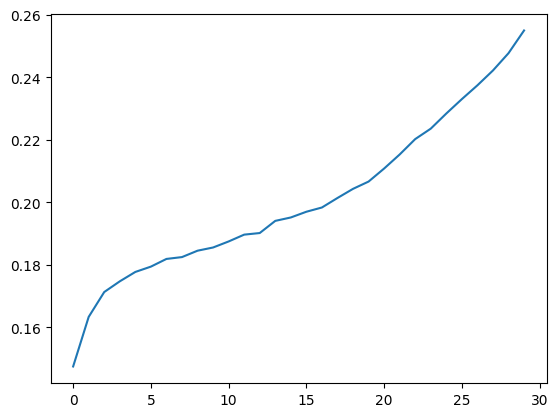

In [26]:
# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [27]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

In [28]:
# predicting or generating the poem with the seed text

seed_text = 'ome will muttered'
next_words = 15

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 19ms/step
ome will muttered you to the and the to the the to him the of the and of


In [29]:
# predicting or generating the poem with the seed text

seed_text = 'southron called the haunted'
next_words = 10

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 20ms/step
southron called the haunted of the the of the the of the the of


In [30]:
# saving the model

model.save('text_generator.h5')

In [31]:
#loading the model
from keras.models import load_model
model = load_model('text_generator.h5')